# **PROYEK ANALISIS DATA : BIKE SHARING**
- Nama : Muhammad Akmal Fauzan
- Email : akmalfau51@gmail.com
- Id Dicoding : akmal_fauzan

# **PERTANYAAN BISNIS :**

1. Apakah kondisi cuaca sangat berpengaruh terhadap penyewa sepeda?
2. Apakah ada pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?
3. Bagaimana tren penggunaan sepeda dalam setahun? apakah tahun 2011 atau 2012 yang lebih unggul?

**Persiapan Library Python**

In [55]:
# Import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# **1. DATA WRANGLING**

# 1.1 GATHERING DATA

In [56]:
# Direktori yang berisi file CSV
data_dir = "/content/drive/MyDrive/Project Dicoding/Belajar Analisis Data dengan Python/data/"

# Membuka Dataset
dfhour = pd.read_csv(data_dir + 'hour.csv')
dfday = pd.read_csv(data_dir + 'day.csv')

In [57]:
dfhour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [58]:
dfday.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# 1.2 ASSESSING DATA

# 1.2 ASSESSING DATA

1.2.1 Memeriksa Tipe Data

In [59]:
dfhour.info()
dfday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

Terdapat 1 kolom yang tipe datanya tidak sesuai yaitu pada dteday. Maka perlu kita ubah menjadi -> **datetime**

1.2.2 Memeriksa Missing Value

In [60]:
# Hitung dan simpan jumlah nilai nol untuk setiap DataFrame
dfhour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [61]:
# Hitung dan simpan jumlah nilai nol untuk setiap DataFrame
dfday.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

1.2.3 Memeriksa Duplicate Data

In [63]:
print("Jumlah duplikasi data pada tabel hour: ", dfhour.duplicated().sum())
print("Jumlah duplikasi data pada tabel day: ", dfday.duplicated().sum())

Jumlah duplikasi data pada tabel hour:  0
Jumlah duplikasi data pada tabel day:  0


# 1.3 CLEANING DATA

In [64]:
# Menghapus beberapa kolom yang tidak diperlukan pada table day
drop_col = ['instant', 'windspeed']

for i in dfday.columns:
  if i in drop_col:
    dfday.drop(labels=i, axis=1, inplace=True)

dfday.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [65]:
# Mengubah tipe data ke datetime
dfday['dteday'] = pd.to_datetime(dfday.dteday)

# Mengubaha tipe data ke categorical
dfday['season'] = dfday.season.astype('category')
dfday['yr'] = dfday.yr.astype('category')
dfday['mnth'] = dfday.mnth.astype('category')
dfday['holiday'] = dfday.holiday.astype('category')
dfday['weekday'] = dfday.weekday.astype('category')
dfday['workingday'] = dfday.workingday.astype('category')
dfday['weathersit'] = dfday.weathersit.astype('category')

dfday.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [66]:
dfday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


In [67]:
# Mengubah angka menjadi keterangan
dfday['season'] = dfday['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
dfday['mnth'] = dfday['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
dfday['weekday'] = dfday['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
dfday['weathersit'] = dfday['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

dfday.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


# **2. Exploratory Data Analysis (EDA)**

In [69]:
# Mengelompokkan penyewa sepeda (baik casual dan registered) berdasarkan bulan
dfday.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
       max   min         mean     sum
mnth                                 
Jan   4521   431  2176.338710  134933
Feb   5062  1005  2655.298246  151352
Mar   8362   605  3692.258065  228920
Apr   7460   795  4484.900000  269094
May   8294  2633  5349.774194  331686
Jun   8120  3767  5772.366667  346342
Jul   8173  3285  5563.677419  344948
Aug   7865  1115  5664.419355  351194
Sep   8714  1842  5766.516667  345991
Oct   8156    22  5199.225806  322352
Nov   6852  1495  4247.183333  254831
Dec   6606   441  3403.806452  211036

In [70]:
# Mengelompokkan penyewa sepeda (baik casual dan registered) berdasarkan cuaca
dfday.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Misty/Cloudy         8362  605  4035.862348   996858
Light Snow/Rain      4639   22  1803.285714    37869

In [72]:
# Mengelompokkan penyewa sepeda (baik casual dan registered) berdasarkan musim
dfday.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Winter   729.112360  3999.050562  8555    22  4728.162921

# **3. Visualization & Explanatory Analysis**

### Pertanyaan 1: Apakah kondisi cuaca sangat berpengaruh terhadap penyewa sepeda?

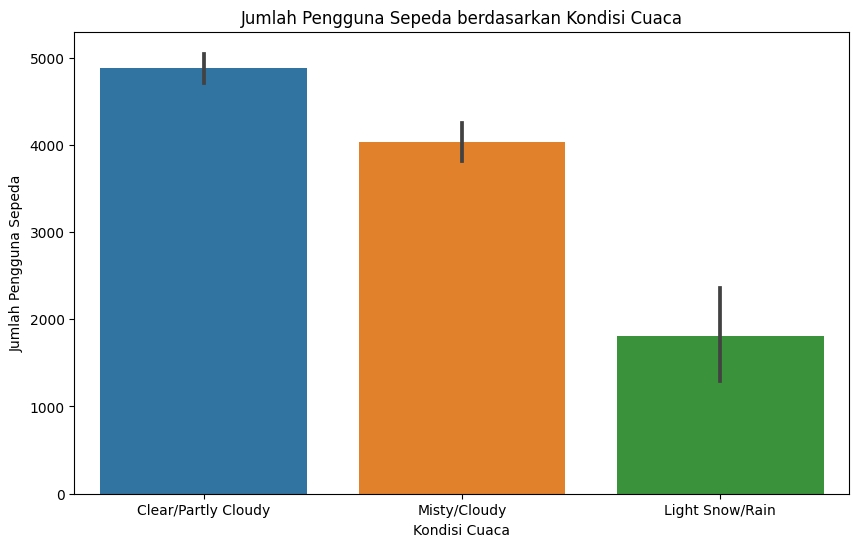

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=dfday)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()


Berdasarkan analisis data melalui representasi grafis dengan menggunakan boxplot, dapat ditarik kesimpulan bahwa terdapat korelasi yang signifikan antara kondisi cuaca dan preferensi penyewa sepeda. Kondisi cuaca yang cerah atau setengah mendung menunjukkan tingkat minat yang paling tinggi, diikuti oleh cuaca berkabut atau mendung, sementara kondisi cuaca sedikit bersalju atau hujan menunjukkan tingkat minat yang paling rendah.

### Pertanyaan 2: Apakah ada pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?

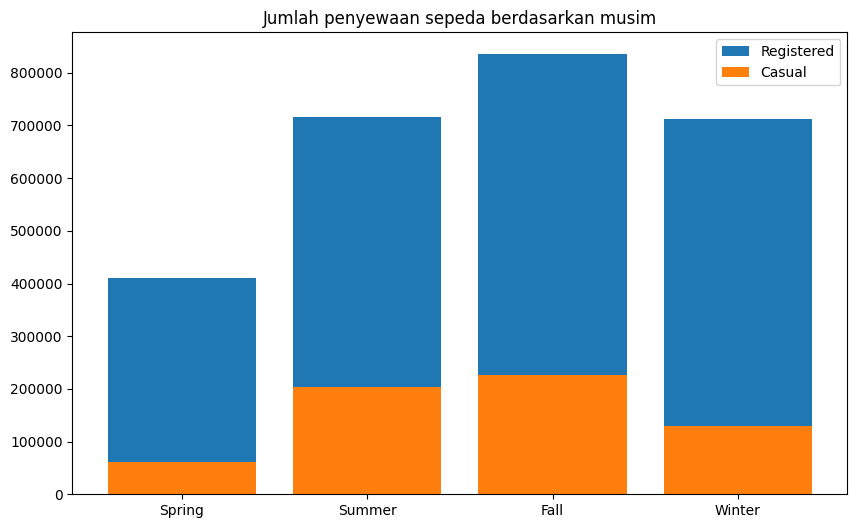

In [74]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan Casual dan Registered
seasonal_usage = dfday.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

Berdasarkan analisis yang dilakukan dengan menggunakan barplot, dapat dinyatakan bahwa di semua musim, musim gugur (Fall) merupakan periode yang paling diminati oleh pengguna sepeda, baik kategori Casual maupun Registered. Selanjutnya, musim panas (Summer) menempati peringkat kedua dalam tingkat preferensi, diikuti oleh musim dingin (Winter), dan musim semi (Spring) menempati posisi terakhir.

### Pertanyaan 3: Bagaimana tren penggunaan sepeda dalam setahun? apakah tahun 2011 atau 2012 yang lebih unggul?

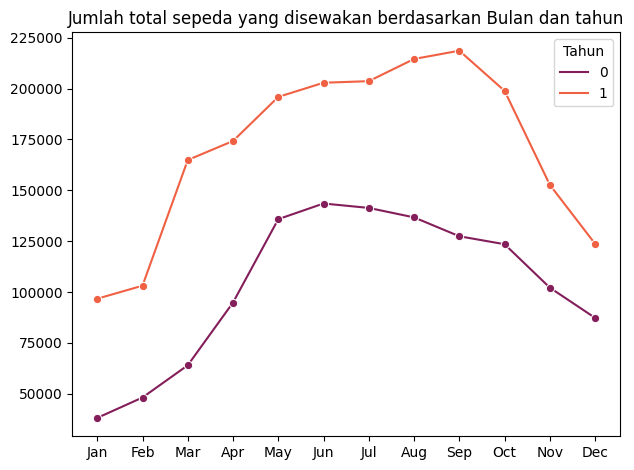

In [76]:
dfday['mnth'] = pd.Categorical(dfday['mnth'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = dfday.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="mnth",
    y="cnt",
    hue="yr",
    palette="rocket",
    marker="o")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Dengan merujuk pada representasi grafis menggunakan lineplot di atas, dapat disimpulkan bahwa selama tahun 2012 (ditunjukkan oleh angka 1), tingkat peminjaman sepeda secara konsisten menunjukkan dominasi sepanjang periode dari Januari hingga Desember. Puncak aktivitas peminjaman sepeda pada tahun 2012 terjadi pada bulan September, sementara bulan Januari mencatatkan tingkat peminjaman yang paling rendah. Sebaliknya, pada tahun 2011, puncak peminjaman sepeda tercatat pada bulan Juni, dengan tingkat peminjaman terendah terjadi pada bulan Januari.

# **CONCLUSION**

Conclusion pertanyaan 1:
Keterkaitan yang jelas terlihat antara preferensi penyewa sepeda dan kondisi cuaca dapat diamati. Penyewa sepeda menunjukkan kecenderungan untuk menyukai kondisi cuaca yang cerah atau sedikit mendung, yang tercermin dari nilai Q3 yang melebihi 6000, Q1 yang kurang dari 4000, dan nilai median yang hampir mencapai 5000. Sementara itu, posisi kedua dalam preferensi muncul saat cuaca berkabut atau mendung, dengan nilai Q3 di atas 5000, Q1 di bawah 3000, dan nilai median di atas 4000. Terakhir, minat pengguna cenderung rendah pada kondisi cuaca sedikit bersalju atau hujan, ditunjukkan oleh nilai Q3 di atas 2000, Q1 di bawah 1000, dan nilai median di atas 1000. Penting untuk dicatat bahwa tidak ada data yang tersedia untuk kondisi cuaca Badai Besar, karena keadaan cuaca tersebut secara praktis tidak memungkinkan untuk bersepeda.


Conclusion pertanyaan 2:
Pada analisis visualisasi terakhir, ditemukan hasil yang mengejutkan, di mana musim semi (Spring) tidak menduduki peringkat terakhir, tetapi malah disusul oleh musim dingin (Winter). Fenomena ini dapat disebabkan oleh berbagai faktor, termasuk kondisi cuaca, suhu udara, hari kerja, hari libur, dan elemen lainnya. Sementara itu, musim gugur (Fall) menduduki peringkat pertama dengan mencatatkan lebih dari 800.000 peminjaman sepeda, menunjukkan bahwa musim tersebut menjadi periode yang paling diminati oleh para penyewa.


Conclusion pertanyaan 3:
Dalam visualisasi ini, perbedaan menonjol terlihat pada puncak dan dasar peminjaman sepeda antara tahun 2011 dan 2012. Puncak peminjaman pada tahun 2011 terjadi pada bulan Juni, dengan dasarnya tercatat pada bulan Januari. Sementara itu, tahun 2012 menunjukkan puncak peminjaman pada bulan September, dengan dasar yang tetap berada pada bulan Januari. Melalui kedua visualisasi ini, dapat disimpulkan bahwa total peminjaman sepeda pada tahun 2012 secara keseluruhan lebih tinggi daripada pada tahun 2011.